In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = pd.read_csv('DS_Sber.csv')
file

,REPORTDATE;VALUE
0,30.12.2013;3457625638
1,31.12.2013;3417092149
2,01.01.2014;3417092149
3,02.01.2014;3417092149
4,03.01.2014;3417092149
...,...
2106,06.10.2019;64630140507
2107,07.10.2019;66115288637
2108,08.10.2019;68424049766
2109,09.10.2019;72492897583


In [3]:
temp = file['REPORTDATE;VALUE'].str[:10]
file['REPORTDATE'] = temp.str[3:5] + '/' + temp.str[:2] + '/' + temp.str[6:]
file['REPORTDATE'] = pd.to_datetime(file['REPORTDATE'])
file['VALUE'] = file['REPORTDATE;VALUE'].str[11:]
file['VALUE'] = pd.to_numeric(file['VALUE'])
file = file.drop(['REPORTDATE;VALUE'], axis=1)
file

,REPORTDATE,VALUE
0,2013-12-30,3457625638
1,2013-12-31,3417092149
2,2014-01-01,3417092149
3,2014-01-02,3417092149
4,2014-01-03,3417092149
...,...,...
2106,2019-10-06,64630140507
2107,2019-10-07,66115288637
2108,2019-10-08,68424049766
2109,2019-10-09,72492897583


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   REPORTDATE  2111 non-null   datetime64[ns]
 1   VALUE       2111 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 33.1 KB


In [5]:
file.describe()

,VALUE
count,2.111000e+03
mean,3.389668e+10
std,1.875474e+10
min,3.282810e+09
25%,1.824160e+10
50%,3.021352e+10
75%,4.758339e+10
max,7.822860e+10


(array([125., 406., 395., 212., 239., 226., 139., 154., 159.,  56.]),
 array([3.28280976e+09, 1.07773886e+10, 1.82719675e+10, 2.57665464e+10,
        3.32611252e+10, 4.07557041e+10, 4.82502830e+10, 5.57448618e+10,
        6.32394407e+10, 7.07340196e+10, 7.82285985e+10]),
 <BarContainer object of 10 artists>)

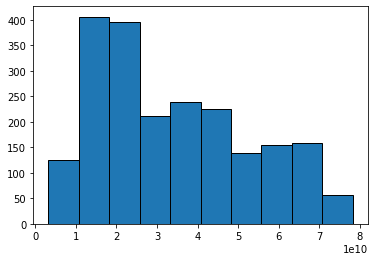

In [6]:
plt.hist(file['VALUE'], edgecolor='black')

In [7]:
import seaborn as sns

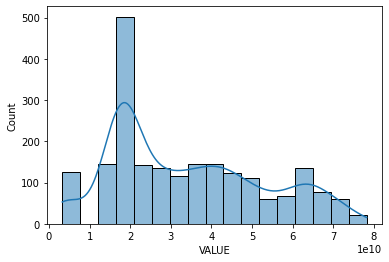

In [8]:
sns.histplot(file['VALUE'], kde=True)
plt.show()

<AxesSubplot:>

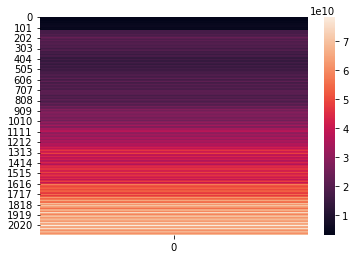

In [9]:
sns.heatmap(np.asarray(file['VALUE']).reshape(-1, 1))

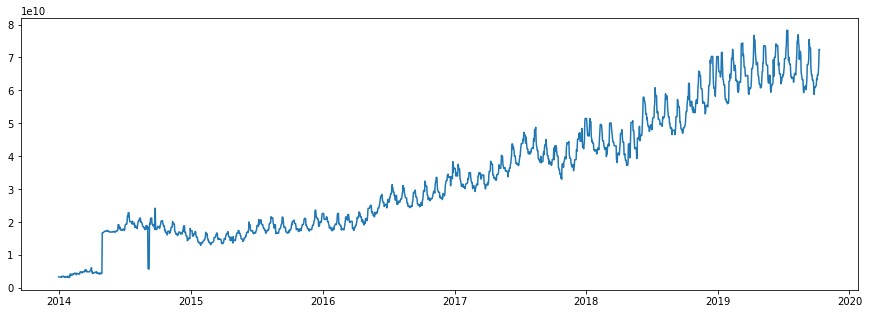

In [10]:
x = file['REPORTDATE']
y = file['VALUE']
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(x, y)
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [97]:
dataset = file['VALUE'].values
dataset = dataset.astype('float32')

In [98]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = dataset.reshape(-1, 1)
dataset = scaler.fit_transform(dataset)

In [99]:
train_size = int(len(dataset) * 0.75)
train = dataset[:train_size, :]
test = dataset[train_size:, :]
train, test

(array([[0.00233256],
        [0.00179172],
        [0.00179172],
        ...,
        [0.5402674 ],
        [0.5402674 ],
        [0.5402674 ]], dtype=float32),
 array([[0.5402674 ],
        [0.48402676],
        [0.5082032 ],
        [0.5696423 ],
        [0.6271101 ],
        [0.6271101 ],
        [0.6271101 ],
        [0.6271101 ],
        [0.6271101 ],
        [0.63409257],
        [0.5939903 ],
        [0.5939903 ],
        [0.5939903 ],
        [0.5616485 ],
        [0.5288835 ],
        [0.5201508 ],
        [0.52562314],
        [0.52490735],
        [0.52490735],
        [0.52490735],
        [0.4810374 ],
        [0.48363963],
        [0.56331545],
        [0.56501186],
        [0.56066203],
        [0.56066203],
        [0.56066203],
        [0.6080404 ],
        [0.61175185],
        [0.553052  ],
        [0.5638615 ],
        [0.575222  ],
        [0.575222  ],
        [0.575222  ],
        [0.5743633 ],
        [0.5910277 ],
        [0.6315744 ],
        [0.67286414],
  

In [100]:
def create_dataset(dataset, look_back=30):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        temp = dataset[i:i+look_back, 0]
        dataX.append(temp)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [101]:
look_back = 60
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX[0]

array([0.00233256, 0.00179172, 0.00179172, 0.00179172, 0.00179172,
       0.00179172, 0.00179172, 0.00050753, 0.00050753, 0.00463634,
       0.0044835 , 0.00370475, 0.00370475, 0.00370475, 0.00532119,
       0.00428249, 0.00023894, 0.00153557, 0.00308038, 0.00308038,
       0.00308038, 0.00096676, 0.00161881, 0.002634  , 0.00489345,
       0.00063632, 0.00063632, 0.00063632, 0.00030893, 0.00476629,
       0.        , 0.00096709, 0.01402043, 0.01402043, 0.01402043,
       0.00961258, 0.00986061, 0.00804681, 0.01198592, 0.01399816,
       0.01399816, 0.01399816, 0.01266941, 0.0143411 , 0.0163039 ,
       0.01798914, 0.01622345, 0.01622345, 0.01622345, 0.01125684,
       0.01390655, 0.01689921, 0.01525378, 0.01484111, 0.01484111,
       0.01484111, 0.0141791 , 0.01317892, 0.01401782, 0.02049096],
      dtype=float32)

In [102]:
trainX.shape

(1522, 60)

In [103]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [104]:
trainX.shape

(1522, 1, 60)

In [105]:
trainX[0]

array([[0.00233256, 0.00179172, 0.00179172, 0.00179172, 0.00179172,
        0.00179172, 0.00179172, 0.00050753, 0.00050753, 0.00463634,
        0.0044835 , 0.00370475, 0.00370475, 0.00370475, 0.00532119,
        0.00428249, 0.00023894, 0.00153557, 0.00308038, 0.00308038,
        0.00308038, 0.00096676, 0.00161881, 0.002634  , 0.00489345,
        0.00063632, 0.00063632, 0.00063632, 0.00030893, 0.00476629,
        0.        , 0.00096709, 0.01402043, 0.01402043, 0.01402043,
        0.00961258, 0.00986061, 0.00804681, 0.01198592, 0.01399816,
        0.01399816, 0.01399816, 0.01266941, 0.0143411 , 0.0163039 ,
        0.01798914, 0.01622345, 0.01622345, 0.01622345, 0.01125684,
        0.01390655, 0.01689921, 0.01525378, 0.01484111, 0.01484111,
        0.01484111, 0.0141791 , 0.01317892, 0.01401782, 0.02049096]],
      dtype=float32)

In [106]:
model = Sequential(name='SBER_MODEL')
model.add(LSTM(2048, input_shape=(1, look_back)))
model.add(Dense(4096))
model.add(Dropout(0.5))
model.add(Dense(4096))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=300, batch_size=16, verbose=1, validation_data=(testX, testY))

Epoch 1/300
96/96 [==============================] - 17s 166ms/step - loss: 0.5088 - val_loss: 0.0115
Epoch 2/300
96/96 [==============================] - 17s 180ms/step - loss: 0.0043 - val_loss: 0.0143
Epoch 3/300
96/96 [==============================] - 15s 158ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 4/300
96/96 [==============================] - 17s 173ms/step - loss: 0.0021 - val_loss: 0.0073
Epoch 5/300
96/96 [==============================] - 16s 164ms/step - loss: 0.0013 - val_loss: 0.0068
Epoch 6/300
96/96 [==============================] - 16s 162ms/step - loss: 0.0010 - val_loss: 0.0090
Epoch 7/300
96/96 [==============================] - 16s 162ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 8/300
96/96 [==============================] - 16s 164ms/step - loss: 9.2261e-04 - val_loss: 0.0043
Epoch 9/300
96/96 [==============================] - 16s 162ms/step - loss: 8.0011e-04 - val_loss: 0.0045
Epoch 10/300
96/96 [==============================] - 15s 161ms/step - los

Epoch 78/300
96/96 [==============================] - 15s 160ms/step - loss: 9.3763e-04 - val_loss: 0.0092
Epoch 79/300
96/96 [==============================] - 17s 175ms/step - loss: 7.2308e-04 - val_loss: 0.0033
Epoch 80/300
96/96 [==============================] - 15s 160ms/step - loss: 9.9903e-04 - val_loss: 0.0034
Epoch 81/300
96/96 [==============================] - 15s 161ms/step - loss: 9.9348e-04 - val_loss: 0.0214
Epoch 82/300
96/96 [==============================] - 15s 160ms/step - loss: 9.9876e-04 - val_loss: 0.0053
Epoch 83/300
96/96 [==============================] - 15s 160ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 84/300
96/96 [==============================] - 15s 160ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 85/300
96/96 [==============================] - 15s 161ms/step - loss: 0.0013 - val_loss: 0.0095
Epoch 86/300
96/96 [==============================] - 15s 160ms/step - loss: 9.9833e-04 - val_loss: 0.0227
Epoch 87/300
96/96 [=============================

96/96 [==============================] - 15s 161ms/step - loss: 0.0010 - val_loss: 0.0041
Epoch 155/300
96/96 [==============================] - 16s 162ms/step - loss: 8.8041e-04 - val_loss: 0.0042
Epoch 156/300
96/96 [==============================] - 15s 161ms/step - loss: 8.3143e-04 - val_loss: 0.0188
Epoch 157/300
96/96 [==============================] - 15s 161ms/step - loss: 8.2305e-04 - val_loss: 0.0083
Epoch 158/300
96/96 [==============================] - 15s 161ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 159/300
96/96 [==============================] - 16s 162ms/step - loss: 0.0012 - val_loss: 6.3424e-04
Epoch 160/300
96/96 [==============================] - 16s 162ms/step - loss: 7.5119e-04 - val_loss: 0.0014
Epoch 161/300
96/96 [==============================] - 15s 161ms/step - loss: 5.9024e-04 - val_loss: 0.0026
Epoch 162/300
96/96 [==============================] - 16s 162ms/step - loss: 7.7758e-04 - val_loss: 8.5910e-04
Epoch 163/300
96/96 [=========================

96/96 [==============================] - 15s 159ms/step - loss: 8.5395e-04 - val_loss: 0.0012
Epoch 231/300
96/96 [==============================] - 15s 159ms/step - loss: 7.4313e-04 - val_loss: 6.4774e-04
Epoch 232/300
96/96 [==============================] - 15s 159ms/step - loss: 8.9697e-04 - val_loss: 0.0141
Epoch 233/300
96/96 [==============================] - 16s 170ms/step - loss: 8.6544e-04 - val_loss: 0.0030
Epoch 234/300
96/96 [==============================] - 16s 170ms/step - loss: 9.4179e-04 - val_loss: 0.0052
Epoch 235/300
96/96 [==============================] - 16s 162ms/step - loss: 8.0387e-04 - val_loss: 8.0163e-04
Epoch 236/300
96/96 [==============================] - 15s 161ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 237/300
96/96 [==============================] - 15s 161ms/step - loss: 8.6183e-04 - val_loss: 5.3473e-04
Epoch 238/300
96/96 [==============================] - 15s 161ms/step - loss: 9.5930e-04 - val_loss: 0.0038
Epoch 239/300
96/96 [=============

In [107]:
model.summary()

Model: "SBER_MODEL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2048)              17276928  
                                                                 
 dense_12 (Dense)            (None, 4096)              8392704   
                                                                 
 dropout_7 (Dropout)         (None, 4096)              0         
                                                                 
 dense_13 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_8 (Dropout)         (None, 4096)              0         
                                                                 
 dense_14 (Dense)            (None, 1)                 4097      
                                                                 
Total params: 42,455,041
Trainable params: 42,455,041
No

In [108]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate RMSE
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print(f'Train Score: {round(trainScore, 2)}')
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print(f'Test Score: {round(testScore, 2)}')

Train Score: 1159594055.17
Test Score: 1793161110.4


In [109]:
trainPredict[0], trainY[0]

(array([4.4645366e+09], dtype=float32),
 array([5.01071998e+09, 5.01071998e+09, 5.01071998e+09, ...,
        3.80194010e+10, 4.37735720e+10, 4.37735720e+10]))

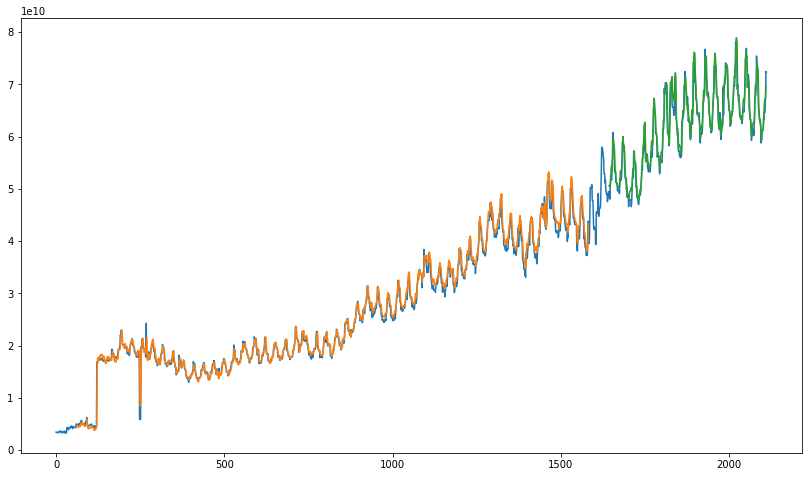

In [110]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+look_back*2+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(14, 8))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [111]:
testPredict[-1]

array([6.971608e+10], dtype=float32)

In [112]:
scaler.inverse_transform(dataset[-1].reshape(-1, 1))

array([[7.230786e+10]], dtype=float32)

In [113]:
trainPredict[-1]

array([4.3313046e+10], dtype=float32)

In [114]:
scaler.inverse_transform(train[-1].reshape(-1, 1))

array([[4.377357e+10]], dtype=float32)

In [115]:
test = create_dataset(dataset, look_back)[0]
test = np.reshape(test, (test.shape[0], 1, test.shape[1]))
scaler.inverse_transform(model.predict(test[-60:]))

array([[7.6299018e+10],
       [7.4988282e+10],
       [7.5472830e+10],
       [7.4061488e+10],
       [7.2563401e+10],
       [6.9683536e+10],
       [7.0136685e+10],
       [7.0490628e+10],
       [7.0558032e+10],
       [7.0010397e+10],
       [6.6880643e+10],
       [6.4990372e+10],
       [6.4037278e+10],
       [6.2791414e+10],
       [6.2364652e+10],
       [6.2244540e+10],
       [6.0726899e+10],
       [6.0043616e+10],
       [6.0983390e+10],
       [6.2352409e+10],
       [6.2440215e+10],
       [6.2646587e+10],
       [6.2612550e+10],
       [6.2760624e+10],
       [6.2698062e+10],
       [6.3471890e+10],
       [6.5657516e+10],
       [6.9043347e+10],
       [7.0018310e+10],
       [6.9972697e+10],
       [6.9540151e+10],
       [7.0097871e+10],
       [7.3289343e+10],
       [7.4226475e+10],
       [7.3518023e+10],
       [7.2721850e+10],
       [7.2538874e+10],
       [6.8247871e+10],
       [6.5530413e+10],
       [6.3779631e+10],
       [6.3641788e+10],
       [6.281256

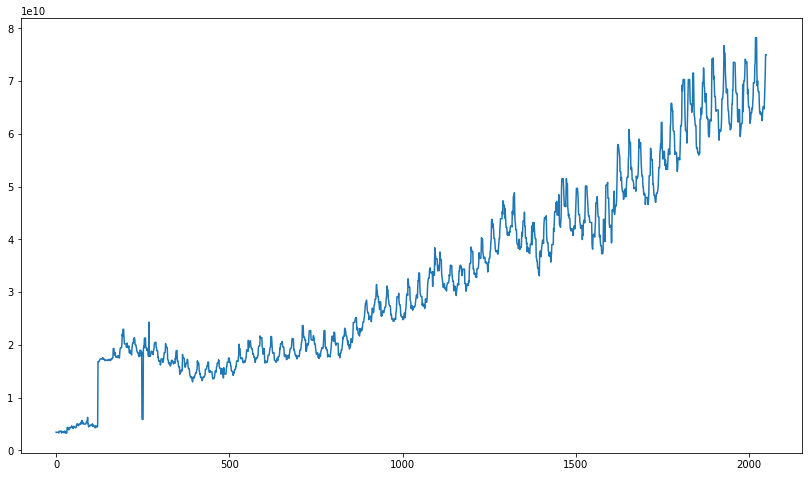

In [116]:
test_1 = scaler.inverse_transform(dataset[:-look_back])
plt.figure(figsize=(14, 8))
plt.plot(test_1)
# plt.plot(np.append(scaler.inverse_transform(dataset), scaler.inverse_transform(model.predict(test[-look_back:]))))
plt.show()

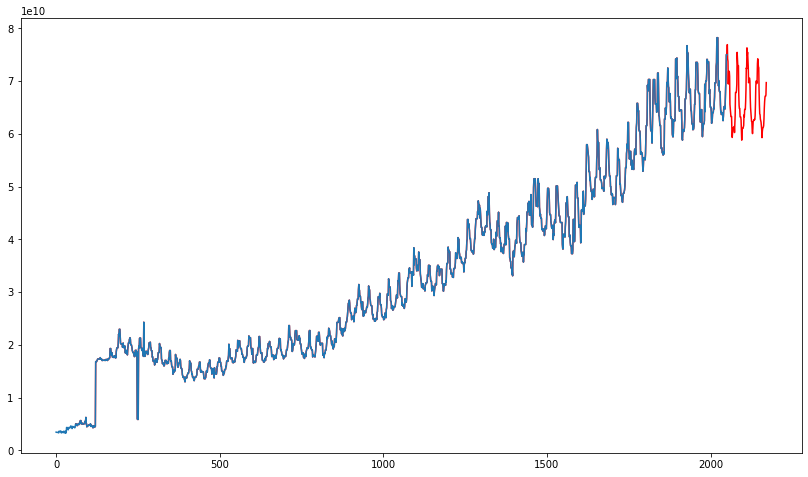

In [117]:
plt.figure(figsize=(14, 8))
test_2 = np.append(scaler.inverse_transform(dataset), scaler.inverse_transform(model.predict(test[-look_back:])))
test_2[:look_back] = np.nan
plt.plot(test_2, color='red')
plt.plot(test_1)


In [118]:
check = np.append(scaler.inverse_transform(dataset), scaler.inverse_transform(model.predict(test[-look_back:])))
check.shape

(2171,)

In [119]:
test_1.shape

(2051, 1)